In [31]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly_express as px


ModuleNotFoundError: No module named 'plotly_express'

In [5]:
fifa = pd.read_csv(r"C:\Users\ashis\Fifa.csv")

In [6]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
skill_cols = ['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [9]:
dfskills = fifa[skill_cols]

In [10]:
import pandas_profiling

In [11]:
pandas_profiling.ProfileReport(dfskills)

Number of variables,34
Number of observations,18207
Total Missing (%),0.2%
Total size in memory,4.7 MiB
Average record size in memory,272.0 B
Numeric,26
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,8


In [12]:
dfskills.dropna(inplace=True)

C:\Users\ashis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


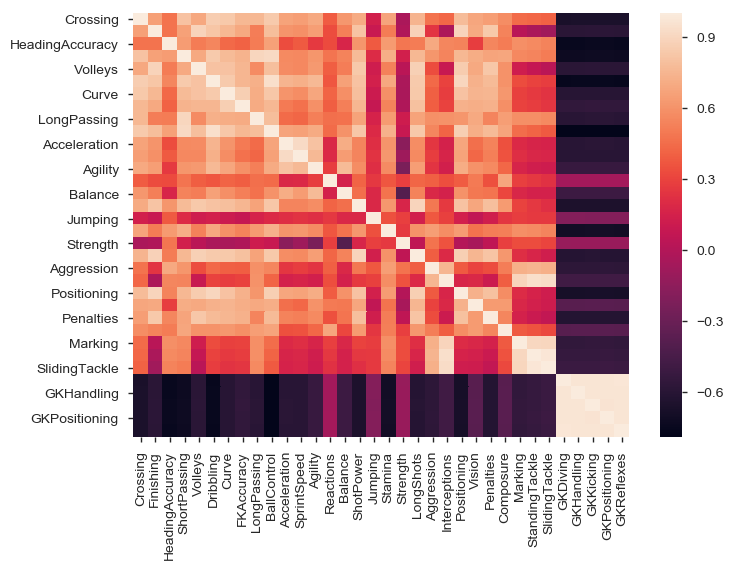

In [14]:
sns.heatmap(dfskills.corr(), annot= False)

In [15]:
from sklearn.decomposition import PCA 

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(dfskills)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_data = scaler.transform(dfskills)
pca

In [21]:
pca = PCA(n_components=5)

In [41]:
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(18159, 5)

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans =KMeans(n_clusters=6)

In [26]:
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

TypeError: float() argument must be a string or a number, not 'PCA'

In [28]:
pca = PCA().fit(dfskills)

In [29]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="Player Skills Dataset - PCA Explained Variance || 89% achieved at 5 components")
fig = dict(data=data, layout=layout)

NameError: name 'go' is not defined

In [32]:
pca = PCA(n_components = 5)

In [33]:
skillsPCA = pca.fit_transform(dfskills)

In [34]:
kmeans = KMeans(n_clusters=6)

In [35]:
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [36]:
dfskillsPCA = pd.DataFrame(skillsPCA)

In [37]:
dfskillsPCA

,0,1,2,3,4
0,-125.195321,-105.490066,46.506043,-4.977262,-5.058670
1,-121.819764,-88.915567,39.950490,30.222316,-43.000190
2,-113.711781,-94.643530,39.772457,-12.760891,-9.516812
3,166.753169,-25.083454,95.339412,-20.497582,-44.468431
4,-133.331955,-35.447856,67.294216,0.975185,0.204431
5,-115.881243,-89.216225,35.008698,-10.006131,-10.439002
6,-132.753887,-13.167812,60.917423,-28.418978,4.545146
7,-106.205870,-60.366973,77.162532,17.502844,-34.397029
8,-110.463968,54.295000,44.455009,12.393001,-24.082874
9,191.532601,-17.951107,80.074650,-20.171315,-55.538261


In [43]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [44]:
x_pca

array([[ 217.36569578,   -7.27722433, -125.12689617,   24.79911888,
         130.34802486],
       [ 217.56928486,   -6.21048894, -125.50133542,   27.17474645,
         127.66168838],
       [ 218.04343477,   -6.76378756, -125.61809473,   24.31266339,
         130.20631536],
       ...,
       [ 227.78407865,   -3.71768169, -132.36751135,   25.30832419,
         132.43122148],
       [ 227.49513419,   -3.53869865, -132.01210163,   25.19401917,
         134.06644523],
       [ 227.1511813 ,   -0.6381004 , -130.3801501 ,   25.32375383,
         132.51403475]])

Text(0,0.5,'second principle compoonent')

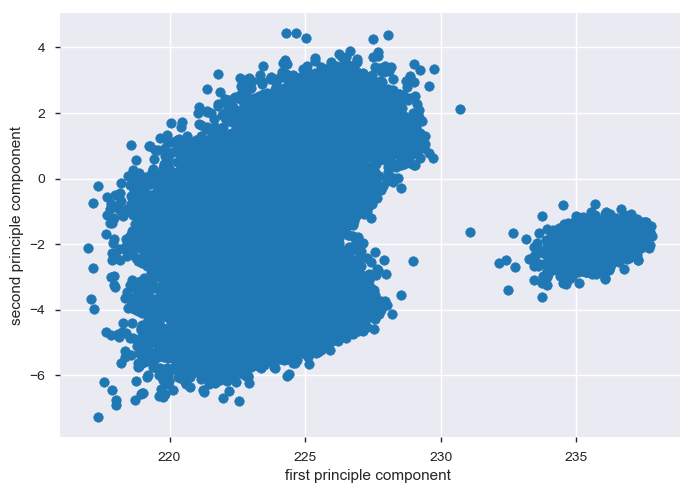

In [50]:
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel('first principle component ')
plt.ylabel('second principle compoonent')

In [47]:
fifa.info

<bound method DataFrame.info of        Unnamed: 0      ID                  Name  Age  \
0               0  158023              L. Messi   31   
1               1   20801     Cristiano Ronaldo   33   
2               2  190871             Neymar Jr   26   
3               3  193080                De Gea   27   
4               4  192985          K. De Bruyne   27   
5               5  183277             E. Hazard   27   
6               6  177003             L. Modrić   32   
7               7  176580             L. Suárez   31   
8               8  155862          Sergio Ramos   32   
9               9  200389              J. Oblak   25   
10             10  188545        R. Lewandowski   29   
11             11  182521              T. Kroos   28   
12             12  182493              D. Godín   32   
13             13  168542           David Silva   32   
14             14  215914              N. Kanté   27   
15             15  211110             P. Dybala   24   
16             1

In [51]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [53]:
df_comp = pd.DataFrame(pca.components_, columns = skill_cols)

In [54]:
df_comp

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.213781,-0.199029,-0.170953,-0.180327,-0.187116,-0.233332,-0.207770,-0.184836,-0.167166,-0.213068,...,-0.162662,-0.100765,-0.153534,-0.159731,-0.148083,0.206742,0.197214,0.191677,0.197980,0.209600
1,-0.044365,-0.257702,0.118866,0.012189,-0.191272,-0.118889,-0.127813,-0.100281,0.048896,-0.051269,...,-0.146040,-0.007583,0.349162,0.411694,0.410859,-0.054076,-0.052350,-0.051476,-0.051457,-0.055210
2,0.118210,0.006830,-0.122505,0.113647,0.080246,-0.002938,0.178925,0.216950,0.218773,0.034561,...,0.020060,0.224734,0.072888,0.093496,0.076625,0.320714,0.307523,0.299809,0.313129,0.327115
3,-0.221268,0.175105,0.392041,-0.017464,0.156948,-0.095184,-0.074590,-0.028490,-0.082326,-0.000728,...,0.177980,0.081415,-0.064115,-0.101003,-0.135419,-0.062346,-0.057692,-0.054799,-0.056654,-0.060639
4,0.078952,-0.032040,-0.178312,0.059730,0.010165,0.003124,0.151183,0.258039,0.148383,0.004019,...,0.044774,-0.124217,0.024490,0.073220,0.069096,-0.122960,-0.114055,-0.108817,-0.122631,-0.126181


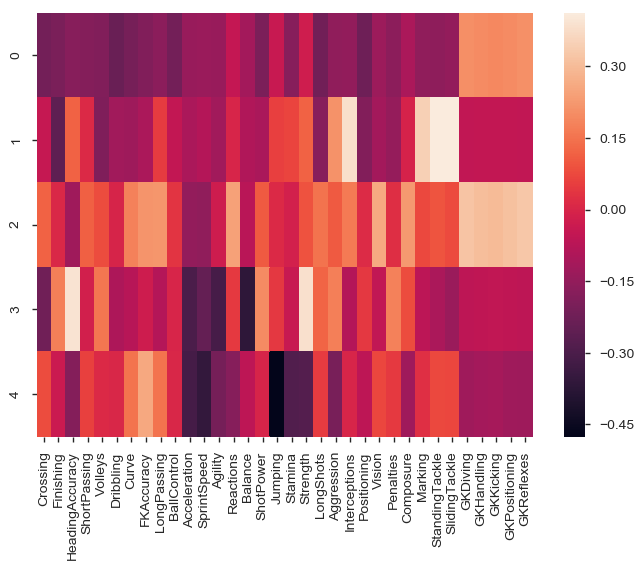

In [55]:
sns.heatmap(df_comp)

In [58]:
skill_cols

['Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [61]:
dfskills.info

<bound method DataFrame.info of        Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0          84.0       95.0             70.0          90.0     86.0       97.0   
1          84.0       94.0             89.0          81.0     87.0       88.0   
2          79.0       87.0             62.0          84.0     84.0       96.0   
3          17.0       13.0             21.0          50.0     13.0       18.0   
4          93.0       82.0             55.0          92.0     82.0       86.0   
5          81.0       84.0             61.0          89.0     80.0       95.0   
6          86.0       72.0             55.0          93.0     76.0       90.0   
7          77.0       93.0             77.0          82.0     88.0       87.0   
8          66.0       60.0             91.0          78.0     66.0       63.0   
9          13.0       11.0             15.0          29.0     13.0       12.0   
10         62.0       91.0             85.0          83.0     89.0       85.0

In [62]:
len(dfskills.columns)

34

In [63]:
pca.explained_variance_ratio_

array([0.57043465, 0.18299967, 0.05674227, 0.04371799, 0.02591271])

In [64]:
df_comp

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.213781,-0.199029,-0.170953,-0.180327,-0.187116,-0.233332,-0.207770,-0.184836,-0.167166,-0.213068,...,-0.162662,-0.100765,-0.153534,-0.159731,-0.148083,0.206742,0.197214,0.191677,0.197980,0.209600
1,-0.044365,-0.257702,0.118866,0.012189,-0.191272,-0.118889,-0.127813,-0.100281,0.048896,-0.051269,...,-0.146040,-0.007583,0.349162,0.411694,0.410859,-0.054076,-0.052350,-0.051476,-0.051457,-0.055210
2,0.118210,0.006830,-0.122505,0.113647,0.080246,-0.002938,0.178925,0.216950,0.218773,0.034561,...,0.020060,0.224734,0.072888,0.093496,0.076625,0.320714,0.307523,0.299809,0.313129,0.327115
3,-0.221268,0.175105,0.392041,-0.017464,0.156948,-0.095184,-0.074590,-0.028490,-0.082326,-0.000728,...,0.177980,0.081415,-0.064115,-0.101003,-0.135419,-0.062346,-0.057692,-0.054799,-0.056654,-0.060639
4,0.078952,-0.032040,-0.178312,0.059730,0.010165,0.003124,0.151183,0.258039,0.148383,0.004019,...,0.044774,-0.124217,0.024490,0.073220,0.069096,-0.122960,-0.114055,-0.108817,-0.122631,-0.126181


In [71]:
df_adjusted  = df_comp.mul(vals, axis=0)

In [67]:
vals=[]

In [68]:
vals = pca.explained_variance_ratio_

In [70]:
df_comp

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.213781,-0.199029,-0.170953,-0.180327,-0.187116,-0.233332,-0.207770,-0.184836,-0.167166,-0.213068,...,-0.162662,-0.100765,-0.153534,-0.159731,-0.148083,0.206742,0.197214,0.191677,0.197980,0.209600
1,-0.044365,-0.257702,0.118866,0.012189,-0.191272,-0.118889,-0.127813,-0.100281,0.048896,-0.051269,...,-0.146040,-0.007583,0.349162,0.411694,0.410859,-0.054076,-0.052350,-0.051476,-0.051457,-0.055210
2,0.118210,0.006830,-0.122505,0.113647,0.080246,-0.002938,0.178925,0.216950,0.218773,0.034561,...,0.020060,0.224734,0.072888,0.093496,0.076625,0.320714,0.307523,0.299809,0.313129,0.327115
3,-0.221268,0.175105,0.392041,-0.017464,0.156948,-0.095184,-0.074590,-0.028490,-0.082326,-0.000728,...,0.177980,0.081415,-0.064115,-0.101003,-0.135419,-0.062346,-0.057692,-0.054799,-0.056654,-0.060639
4,0.078952,-0.032040,-0.178312,0.059730,0.010165,0.003124,0.151183,0.258039,0.148383,0.004019,...,0.044774,-0.124217,0.024490,0.073220,0.069096,-0.122960,-0.114055,-0.108817,-0.122631,-0.126181


In [72]:
df_adjusted

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.121948,-0.113533,-0.097517,-0.102865,-0.106738,-0.133101,-0.118519,-0.105437,-0.095357,-0.121541,...,-0.092788,-0.057480,-0.087581,-0.091116,-0.084471,0.117933,0.112498,0.109339,0.112935,0.119563
1,-0.008119,-0.047159,0.021752,0.002231,-0.035003,-0.021757,-0.023390,-0.018351,0.008948,-0.009382,...,-0.026725,-0.001388,0.063897,0.075340,0.075187,-0.009896,-0.009580,-0.009420,-0.009417,-0.010103
2,0.006708,0.000388,-0.006951,0.006449,0.004553,-0.000167,0.010153,0.012310,0.012414,0.001961,...,0.001138,0.012752,0.004136,0.005305,0.004348,0.018198,0.017450,0.017012,0.017768,0.018561
3,-0.009673,0.007655,0.017139,-0.000763,0.006861,-0.004161,-0.003261,-0.001246,-0.003599,-0.000032,...,0.007781,0.003559,-0.002803,-0.004416,-0.005920,-0.002726,-0.002522,-0.002396,-0.002477,-0.002651
4,0.002046,-0.000830,-0.004621,0.001548,0.000263,0.000081,0.003918,0.006686,0.003845,0.000104,...,0.001160,-0.003219,0.000635,0.001897,0.001790,-0.003186,-0.002955,-0.002820,-0.003178,-0.003270


In [78]:
df_adjusted

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.121948,-0.113533,-0.097517,-0.102865,-0.106738,-0.133101,-0.118519,-0.105437,-0.095357,-0.121541,...,-0.092788,-0.057480,-0.087581,-0.091116,-0.084471,0.117933,0.112498,0.109339,0.112935,0.119563
1,-0.008119,-0.047159,0.021752,0.002231,-0.035003,-0.021757,-0.023390,-0.018351,0.008948,-0.009382,...,-0.026725,-0.001388,0.063897,0.075340,0.075187,-0.009896,-0.009580,-0.009420,-0.009417,-0.010103
2,0.006708,0.000388,-0.006951,0.006449,0.004553,-0.000167,0.010153,0.012310,0.012414,0.001961,...,0.001138,0.012752,0.004136,0.005305,0.004348,0.018198,0.017450,0.017012,0.017768,0.018561
3,-0.009673,0.007655,0.017139,-0.000763,0.006861,-0.004161,-0.003261,-0.001246,-0.003599,-0.000032,...,0.007781,0.003559,-0.002803,-0.004416,-0.005920,-0.002726,-0.002522,-0.002396,-0.002477,-0.002651
4,0.002046,-0.000830,-0.004621,0.001548,0.000263,0.000081,0.003918,0.006686,0.003845,0.000104,...,0.001160,-0.003219,0.000635,0.001897,0.001790,-0.003186,-0.002955,-0.002820,-0.003178,-0.003270


In [75]:
test=df_adjusted.groupby(by = skill_cols)

In [77]:
test.sum()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
-0.121948,-0.113533,-0.097517,-0.102865,-0.106738,-0.133101,-0.118519,-0.105437,-0.095357,-0.121541,-0.079256,-0.077057,-0.079045,-0.027825,-0.066539,-0.111747,-0.023183,-0.098599,-0.013212,-0.123601,-0.087477,-0.086049,-0.128211,-0.073852,-0.092788,-0.057480,-0.087581,-0.091116,-0.084471,0.117933,0.112498,0.109339,0.112935,0.119563
-0.009673,0.007655,0.017139,-0.000763,0.006861,-0.004161,-0.003261,-0.001246,-0.003599,-0.000032,-0.013177,-0.010736,-0.013615,0.001966,-0.016055,0.008666,0.001915,-0.001812,0.016791,0.005318,0.007542,-0.003529,0.001831,-0.002450,0.007781,0.003559,-0.002803,-0.004416,-0.005920,-0.002726,-0.002522,-0.002396,-0.002477,-0.002651
-0.008119,-0.047159,0.021752,0.002231,-0.035003,-0.021757,-0.023390,-0.018351,0.008948,-0.009382,-0.017994,-0.015341,-0.022245,0.000176,-0.016548,-0.019165,0.010493,0.012476,0.021834,-0.031752,0.039028,0.069664,-0.033157,-0.021251,-0.026725,-0.001388,0.063897,0.075340,0.075187,-0.009896,-0.009580,-0.009420,-0.009417,-0.010103
0.002046,-0.000830,-0.004621,0.001548,0.000263,0.000081,0.003918,0.006686,0.003845,0.000104,-0.008189,-0.009214,-0.005427,-0.004582,-0.001601,-0.000028,-0.012327,-0.007454,-0.007290,0.001267,-0.005304,0.000047,-0.001636,0.001831,0.001160,-0.003219,0.000635,0.001897,0.001790,-0.003186,-0.002955,-0.002820,-0.003178,-0.003270
0.006708,0.000388,-0.006951,0.006449,0.004553,-0.000167,0.010153,0.012310,0.012414,0.001961,-0.008423,-0.008876,-0.001430,0.013862,-0.004020,0.005921,0.000571,-0.000740,0.005213,0.008557,0.005919,0.009378,0.000875,0.014759,0.001138,0.012752,0.004136,0.005305,0.004348,0.018198,0.017450,0.017012,0.017768,0.018561


In [80]:
df_adjusted.sum(axis =0)

Crossing          -0.130987
Finishing         -0.153480
HeadingAccuracy   -0.070197
ShortPassing      -0.093401
Volleys           -0.130062
Dribbling         -0.159104
Curve             -0.131100
FKAccuracy        -0.106037
LongPassing       -0.073749
BallControl       -0.128890
Acceleration      -0.127040
SprintSpeed       -0.121223
Agility           -0.121762
Reactions         -0.016403
Balance           -0.104762
ShotPower         -0.116353
Jumping           -0.022531
Stamina           -0.096129
Strength           0.023336
LongShots         -0.140211
Aggression        -0.040292
Interceptions     -0.010489
Positioning       -0.160297
Vision            -0.080964
Penalties         -0.109434
Composure         -0.045775
Marking           -0.021717
StandingTackle    -0.012989
SlidingTackle     -0.009066
GKDiving           0.120323
GKHandling         0.114889
GKKicking          0.111716
GKPositioning      0.115631
GKReflexes         0.122100
dtype: float64

In [82]:
absolute_df_adjusted = df_adjusted.abs()

In [85]:
rankings = absolute_df_adjusted.sum(axis = 0)

In [93]:
rankings.sort_values(ascending=False)

StandingTackle     0.178074
SlidingTackle      0.171717
LongShots          0.170494
Finishing          0.169565
Interceptions      0.168667
Positioning        0.165709
Dribbling          0.159266
Curve              0.159240
Marking            0.159051
GKReflexes         0.154148
Volleys            0.153418
GKDiving           0.151939
Crossing           0.148494
HeadingAccuracy    0.147981
GKPositioning      0.145773
ShotPower          0.145527
Aggression         0.145272
GKHandling         0.145005
FKAccuracy         0.144030
GKKicking          0.140986
BallControl        0.133021
Penalties          0.129593
Acceleration       0.127040
LongPassing        0.124163
Agility            0.121762
SprintSpeed        0.121223
Stamina            0.121082
Vision             0.114143
ShortPassing       0.113855
Balance            0.104762
Composure          0.078397
Strength           0.064340
Jumping            0.048487
Reactions          0.048410
dtype: float64